Detecting COVID-19 with TensorFlow

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggizhaputri","key":"8cfcdbd3ce5795a8b9a81a233c47c39d"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [6]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 1.15G/1.15G [00:17<00:00, 94.6MB/s]
100% 1.15G/1.15G [00:17<00:00, 71.3MB/s]


In [7]:
import zipfile,os
local_zip = '/content/covid19-radiography-database.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
base_dir = '/tmp/COVID-19 Radiography Database'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    '/tmp/COVID-19 Radiography Database',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/tmp/COVID-19 Radiography Database', # same directory as training data
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    
    subset='validation') # set as validation data

Found 2325 images belonging to 3 classes.
Found 580 images belonging to 3 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator  , # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 46s - loss: 0.9444 - accuracy: 0.4423 - val_loss: 1.0873 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 46s - loss: 0.8690 - accuracy: 0.4725 - val_loss: 0.8940 - val_accuracy: 0.7000
Epoch 3/20
25/25 - 47s - loss: 0.6980 - accuracy: 0.7038 - val_loss: 0.4461 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 45s - loss: 0.5468 - accuracy: 0.7719 - val_loss: 0.5177 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 46s - loss: 0.4106 - accuracy: 0.8450 - val_loss: 0.3033 - val_accuracy: 0.8750
Epoch 6/20
25/25 - 47s - loss: 0.4509 - accuracy: 0.8365 - val_loss: 0.2898 - val_accuracy: 0.8750
Epoch 7/20
25/25 - 46s - loss: 0.4195 - accuracy: 0.8338 - val_loss: 0.3408 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 46s - loss: 0.4023 - accuracy: 0.8525 - val_loss: 0.1897 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 46s - loss: 0.3661 - accuracy: 0.8682 - val_loss: 0.3107 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 46s - loss: 0.3390 - accuracy: 0.8568 - val_loss: 0.2875 - val_accuracy: 0.9000
Epoch 11/

Saving COVID-19 (46).png to COVID-19 (46) (1).png
COVID-19 (46).png
[[1. 0. 0.]]
covid


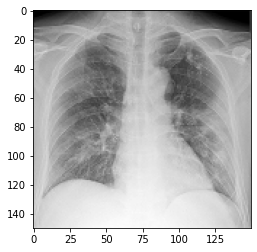

In [37]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 0.]]"):
    print('covid')
  elif (predict=="[[0. 1. 0.]]"):
    print('normal')
  else:
    print ('viral')

Saving NORMAL (2).png to NORMAL (2) (1).png
NORMAL (2).png
[[0. 1. 0.]]
normal


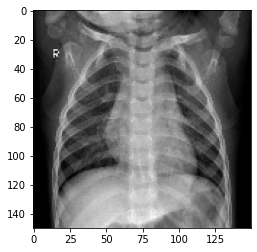

In [38]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 0.]]"):
    print('covid')
  elif (predict=="[[0. 1. 0.]]"):
    print('normal')
  else:
    print ('viral')

Saving Viral Pneumonia (5).png to Viral Pneumonia (5).png
Viral Pneumonia (5).png
[[0. 0. 0.]]
viral


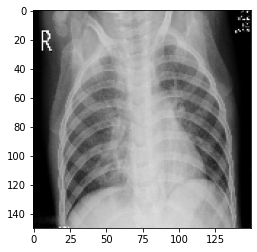

In [39]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

  predict = str(classes)
  if (predict=="[[1. 0. 0.]]"):
    print('covid')
  elif (predict=="[[0. 1. 0.]]"):
    print('normal')
  else:
    print ('viral')